#**Obligatorisk opgave Machine learning**

Mikkel, Carl, Simon & Oliver haffenrichter


#**Step 1**


1. Define the objective in business terms

Objektet er at lave en lineær regressionsmodel for JPM-Finance som kan hjælpe med at forudsige profitten for nye startup firmaer baseret på deres udgifter.

2. How shall your solution be used?

Som en JPM-Finance medarbejder, ønsker jeg at bruge den lineær regressionsmodel til at kunne forudsige profitten for forskellige startup firmaer, ud fra udgifter

4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?

Det er et offline supervised problem. Det er supervised, da vi arbejder med data der er labels i form af profitten. Det er offline, fordi vi sidder med data lokalt og ikke skal køre det i real-time.

5. How should performance be measured?

Vi har besluttet at gøre brug af RMSE til at måle performance på vores model. Det har vi valgt at gøre, da RMSE er god til at bedømme performance i situationer hvor man arbejder med profit. Den hjælper med at forudsige om de forventede værdier passer i forhold til de faktiske værdier.

6. Is the performance measure aligned with the business objective?

RMSE passer med business objective, da den som nævnt tidligere, er god til at hjælpe med at forudsige om de forventede værdier passer. Det er det mål, firmaet ønsker i forbindelse med profit.

8. What are comparable problems? Can you reuse experience?

- Forudsigelse af salg, hvor man laver forudsigelser af salg baseret på forskellige ting såsom reklameudgifter, kampagner og sæsonudsving.

- Forudsigelse af aktiemarkedet, hvor man forudsiger market baseret på forskellige finansielle indikatorer og markedstendenser.

11. List the assumptions you (or others have made so far)

- State feature er en tekst attribut som er blevet besluttet at det ikke skal bruges.
- Der er antaget at visse datasæt sættes til 0.0 og derfor skal de ikke konverteres til nogen middelværdier eller at droppe dem helt.
- En anden antagelse kan være at profitten skal ikke noteres helt nøjagtigt, men derimod deles op i kategorier såsom lav, mellem og høj.
- Hvis korrelationsmatricen for en feature hvis værdier kun er højere end 0.20 eller lavere end -0.20 så er det ikke en god ide at kombinere


#**Step 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from pathlib import Path
import tarfile
import urllib.request
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Check out how much space it requires.
Action: Probably none as the dataset is super small




> Da datasættet er småt kræver det ikke specielt meget plads (2040 bytes)



5. Get access authorizations.
Action: That is, give yourself access to e.g. your Google drive. Otherwise, this may be a
tedious and bureaucratic procedure that has to be considered in the planning.



> Alle har adgang til notesbogen og et docsdokument, samt data via google drive



6. Create a workspace (with enough storage space).
Action: That is establishing a notebook at your PC (e.g. Jupyter) or in the cloud (e.g. Colab)
for the program and data set,

7. Get the data.
Action: Establish a data fetch routine in your notebook. You may get a suggestion from the
Moodle Machine Learning room.
Code is to be established in your notebook.

In [ ]:
import os

# Print current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# List files in a directory
directory_to_list = "drive/MyDrive/Colab Notebooks/"
files_in_directory = os.listdir(directory_to_list)
print("Files in", directory_to_list, ":", files_in_directory)

Current Working Directory: /content
Files in drive/MyDrive/Colab Notebooks/ : ['Untitled0.ipynb', 'Linear regression.ipynb', 'RegressionPerformance.ipynb', 'LinearRegressionStandard.pynb', 'LinearRegMissingData.ipynb', '50_Startups.csv', '50_Startups.xlsx', 'Mandatory1.ipynb']


In [ ]:
dataset = pd.read_excel('drive/MyDrive/Colab Notebooks/50_Startups.xlsx')
#grabs all features
x = dataset.iloc[ : , :-1 ].values
#grabs the last column in index, the dependant variable
y = dataset.iloc[:, -1].values

In [ ]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
print("Features: ", x)

Features:  [[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florid

In [ ]:
print("Labels: ", y)

Labels:  [192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


8. Convert the data to a format you can easily manipulate (without changing the data itself).
Action: Common conversions between datatypes needed as you go.
Code is to be established in your notebook. Goes along with your coding.

10. Check the size and type of data (time series, sample, geographical, etc.).
Action: Code is to be established in your notebook like section ‘Take a Quick Look at the
Data Structure’ in notebook for chapter 2.


Visualizing Geographical Data



```
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()
```



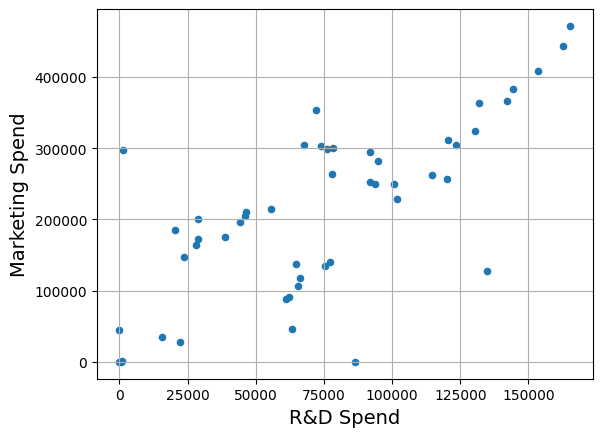

In [ ]:
dataset.plot(kind="scatter", x="R&D Spend", y="Marketing Spend", grid=True)

plt.show()

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
print("Størrelse på datasættet:", dataset.shape)
print("Info: ")
dataset.info()

Størrelse på datasættet: (50, 5)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
dataset.memory_usage()

Index              128
R&D Spend          400
Administration     400
Marketing Spend    400
State              400
Profit             400
dtype: int64

11. Create a test set, put it aside, and never look at it (no data snooping!).
A problem here is that the data set is small -> Use stratification.
Action: Make stratified test and learning sets (1 fold).
Code is to be established in your notebook. Find your stuff in section ‘Create a Test Set’ in
notebook for chapter 2

In [ ]:
#Dataset splidt op i features og labels når vi henter datasettet


In [ ]:
from sklearn.model_selection import train_test_split
#random = 1 just to control the randomness so it always chooses specific values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
#Training Features
print(x_train)

[[63408.86 129219.61 46085.25 'California']
 [38558.51 82982.09 174999.3 'California']
 [78389.47 153773.43 299737.29 'New York']
 [28663.76 127056.21 201126.82 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [23640.93 96189.63 148001.11 'California']
 [0.0 116983.8 45173.06 'California']
 [75328.87 144135.98 134050.07 'Florida']
 [73994.56 122782.75 303319.26 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [27892.92 84710.77 164470.71 'Florida']
 [94657.16 145077.58 282574.31 'New York']
 [1000.23 124153.04 1903.93 'New York']
 [77044.01 99281.34 140574.81 'New York']
 [67532.53 105751.03 304768.73 'Florida']
 [142107.34 91391.77 366168.42 'Florida']
 [55493.95 103057.49 214634.81 'Florida']
 [119943.24 156547.42 256512.92 'Florida']
 [61994.48 115641.28 91131.24 'Florida']
 [101913.08 110594.11 229160.95 'Florida']
 [66051.52 182645.56 118148.2 'Florida']
 [22177.74 154806.14 28334.72 'California']
 [46426.07 157693.92 210797.67 'California']
 [91749.16 114175.79 294919.57 '

In [ ]:
#Test Features
print(x_test)

[[72107.6 127864.55 353183.81 'New York']
 [46014.02 85047.44 205517.64 'New York']
 [28754.33 118546.05 172795.67 'California']
 [20229.59 65947.93 185265.1 'New York']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [542.05 51743.15 0.0 'New York']
 [65605.48 153032.06 107138.38 'New York']
 [1315.46 115816.21 297114.46 'Florida']
 [61136.38 152701.92 88218.23 'New York']]


In [ ]:
#Training Labels
print(y_train)

[ 97427.84  81005.76 111313.02  90708.19 122776.86  71498.49  14681.4
 105733.54 110352.25 134307.35  77798.83 125370.37  64926.08 108552.04
 108733.99 166187.94  96778.92 132602.65  99937.59 146121.95 103282.38
  65200.33  96712.8  124266.9  118474.03 107404.34 156122.51 155752.6
  42559.73 191792.06 126992.93 192261.83 129917.04 156991.12 144259.4
 149759.96 152211.77 141585.52  69758.98  89949.14]


In [ ]:
#Test Labels
print(y_test)

[105008.31  96479.51  78239.91  81229.06 191050.39 182901.99  35673.41
 101004.64  49490.75  97483.56]


#**Step 3**

1. Create a copy of the data for exploration (sampling it down to a manageable size if
necessary).
Action: Easy action, no sampling needed.

In [ ]:

copy_dataset = dataset.copy()

In [ ]:
copy_dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


2. Create a notebook to keep a record of your data exploration.
Action: You have probably already done that. A copy and paste and changes of the chapter
2 housing notebook is not illegal 


Notebook oprettet

3. Study each attribute and its characteristics:
- Name
- Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
- % of missing values
- N/A. Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
- Usefulness for the task
  (State is pretty useless for this task)
- Type of distribution (Gaussian, uniform, logarithmic, etc.). Check with the selected
model if OK.
- Do a histogram for each attribute.
Action: Get inspired by the notebook for chapter 2
Code is to be established. Find your stuff in section ‘Take a Quick Look at the Data
Structure’ in notebook for chapter 2



In [ ]:
copy_dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
copy_dataset.isnull().mean()

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

**State er Categorical**

Fjern State Column

In [ ]:
#Drop returnere en ny liste
copy_dataset = copy_dataset.drop(['State'], axis=1)
print(copy_dataset)

    R&D Spend  Administration  Marketing Spend     Profit
0   165349.20       136897.80        471784.10  192261.83
1   162597.70       151377.59        443898.53  191792.06
2   153441.51       101145.55        407934.54  191050.39
3   144372.41       118671.85        383199.62  182901.99
4   142107.34        91391.77        366168.42  166187.94
5   131876.90        99814.71        362861.36  156991.12
6   134615.46       147198.87        127716.82  156122.51
7   130298.13       145530.06        323876.68  155752.60
8   120542.52       148718.95        311613.29  152211.77
9   123334.88       108679.17        304981.62  149759.96
10  101913.08       110594.11        229160.95  146121.95
11  100671.96        91790.61        249744.55  144259.40
12   93863.75       127320.38        249839.44  141585.52
13   91992.39       135495.07        252664.93  134307.35
14  119943.24       156547.42        256512.92  132602.65
15  114523.61       122616.84        261776.23  129917.04
16   78013.11 

**Histogram**



```
# import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()
```



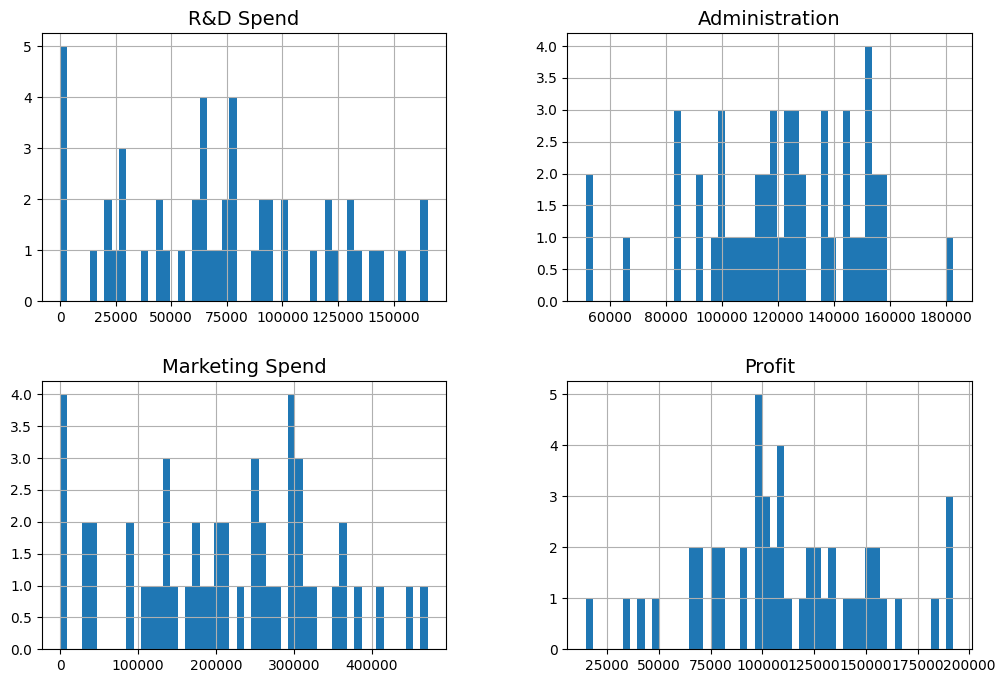

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

copy_dataset.hist(bins=50, figsize=(12, 8))
plt.show()

4. For supervised learning tasks, identify the target attribute(s); i.e. the label(s).
Action: Identify target attributes, if any.
To be documented – e.g. in the your notebook.

Features & Labels

In [ ]:
#Extracting possible features: R&D Spend, Administration, Marketing Spend, States have been removed due to it not being necessary
#features = dataset.iloc[:, :-2].values

#Extraction labels: Profit
#labels = dataset.iloc[:, 4].values
#grabs all features
copy_x = copy_dataset.iloc[ : , :-1 ].values
#grabs the last column in index, the dependant variable
copy_y = copy_dataset.iloc[:, -1].values

In [ ]:
print("Features: ")
print(copy_x)

Features: 
[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]

In [ ]:
print("Labels: ")
print(copy_y)

Labels: 
[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


6. Study the correlations between attributes.
Action: Make also a scatter matrix plot together with the correlation results.
Code is to be established in your notebook like section ‘Looking for Correlations’ in
notebook for chapter 2

In [ ]:
#Finding Correlations
corr_matrix = copy_dataset.corr(numeric_only = True)
print(corr_matrix)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


In [ ]:
#Making a scatterplot over the numeric attributes
from pandas.plotting import scatter_matrix

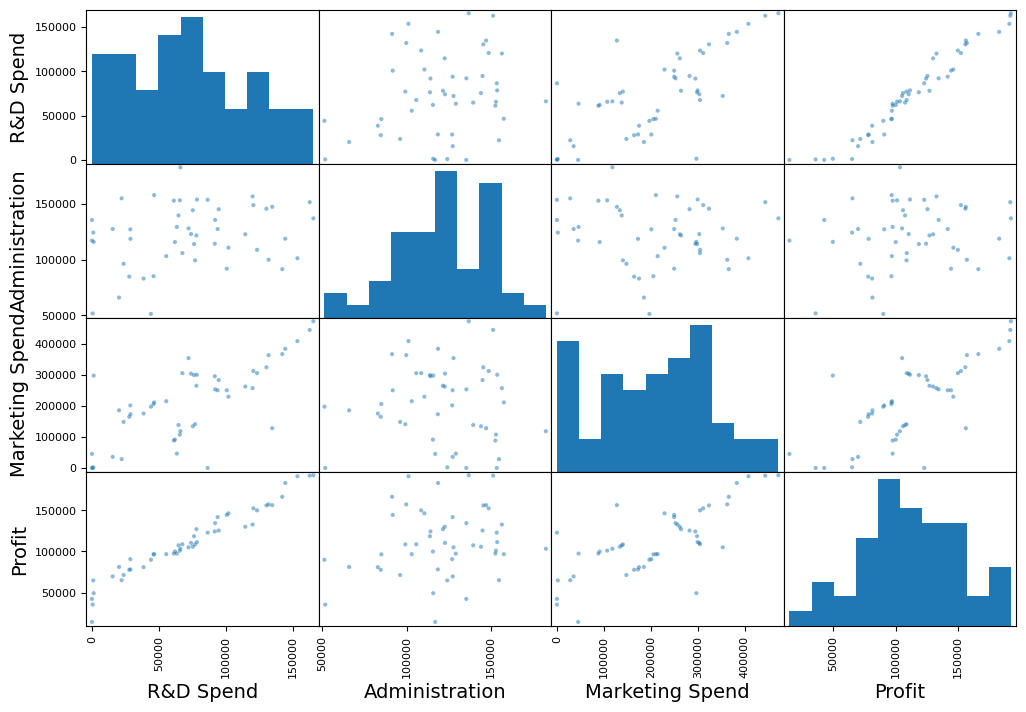

In [ ]:
attributes = ["R&D Spend", "Administration", "Marketing Spend", "Profit"]
scatter_matrix(copy_dataset[attributes], figsize =(12,8))
plt.show()

8. Experiment with attribute combinations.
Action: Code is to be established in your notebook like in section ‘Experimenting with
Attribute Combinations’ in notebook for chapter 2.



```
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)
```


Grundet tvivl med relevancen har vi bestemt ikke at kombinere attributerne i vores dataset

In [ ]:
corr_matrix = copy_dataset.corr(numeric_only = True)
corr_matrix["Profit"].sort_values(ascending = False)

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64

*9*. Identify a new promising attribute you may want to apply, if any.
Action: Identify those with a strong correlation to the target attribute.
To be documented – e.g. in your notebook.

Baseret på de angivne korrelationskoefficienter har attributten "R&D Spend" den stærkeste positive korrelation med "Profit" (korrelationskoefficient på 0.9729).

#**Step 4**



```
# Notes:
- Work on copies of the data (keep the original dataset intact).
- Write functions for all data transformations you apply, for five reasons:
- So you can easily prepare the data the next time you get a fresh dataset
- So you can apply these transformations in future projects
- To clean and prepare the test set
- To clean and prepare new data instances once your solution is live
- To make it easy to treat your preparation choices as hyperparameters
```



*2*. Feature selection (optional):
 Drop the attributes that provide no useful information for the task.
Action: Code is to be established in your notebook, that is find out how to apply the drop
method

Vi har tidligere i koden valgt at fjerne State fra datasættet da denne ikke havde nogen relevans for algoritmen. Som ses tidligere er den fjernet ved brug af drop-metoden

4. Handle text and categorical attributes using “import OneHotEncoder”.
Action: Find out what to do with the ‘State’ attribute.
Code is to be established in your notebook
Note what is stated in the case description!

Fra Domain Description:
"The “State” feature is a text attribute, and from previous study not very important, meaning
one can drop this feature. Thus, all calculations using “import OneHotEncoder” are
superfluous. Just skip them for a start. Later if You like, You can play with the
OneHotEncoder."

5. Feature scaling:
 Standardize or normalize features, if necessary.
Action: Include the StandardScaler in the pipeline and observe if it does any difference
when applying the **Linear Regression algorithm.**
Code is to be established in your notebook e.g. find out how to apply the make_pipeline
as done in section ‘Training and Evaluating on the Training Set’ in the notebook for
chapter 2.

Train/Test Copy

In [ ]:
from sklearn.model_selection import train_test_split
#random = 1 just to control the randomness so it always chooses specific values
copy_x_train, copy_x_test, copy_y_train, copy_y_test = train_test_split(copy_x, copy_y, test_size = 0.2, random_state = 1)

In [ ]:
print(copy_x_train)

[[ 63408.86 129219.61  46085.25]
 [ 38558.51  82982.09 174999.3 ]
 [ 78389.47 153773.43 299737.29]
 [ 28663.76 127056.21 201126.82]
 [ 86419.7  153514.11      0.  ]
 [ 23640.93  96189.63 148001.11]
 [     0.   116983.8   45173.06]
 [ 75328.87 144135.98 134050.07]
 [ 73994.56 122782.75 303319.26]
 [ 91992.39 135495.07 252664.93]
 [ 27892.92  84710.77 164470.71]
 [ 94657.16 145077.58 282574.31]
 [  1000.23 124153.04   1903.93]
 [ 77044.01  99281.34 140574.81]
 [ 67532.53 105751.03 304768.73]
 [142107.34  91391.77 366168.42]
 [ 55493.95 103057.49 214634.81]
 [119943.24 156547.42 256512.92]
 [ 61994.48 115641.28  91131.24]
 [101913.08 110594.11 229160.95]
 [ 66051.52 182645.56 118148.2 ]
 [ 22177.74 154806.14  28334.72]
 [ 46426.07 157693.92 210797.67]
 [ 91749.16 114175.79 294919.57]
 [ 76253.86 113867.3  298664.47]
 [ 64664.71 139553.16 137962.62]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [     0.   135426.92      0.  ]
 [162597.7  151377.59 443898.53]
 [ 78013.1

In [ ]:
print(copy_x_test)

[[ 72107.6  127864.55 353183.81]
 [ 46014.02  85047.44 205517.64]
 [ 28754.33 118546.05 172795.67]
 [ 20229.59  65947.93 185265.1 ]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [   542.05  51743.15      0.  ]
 [ 65605.48 153032.06 107138.38]
 [  1315.46 115816.21 297114.46]
 [ 61136.38 152701.92  88218.23]]


In [ ]:
print(copy_y_train)

[ 97427.84  81005.76 111313.02  90708.19 122776.86  71498.49  14681.4
 105733.54 110352.25 134307.35  77798.83 125370.37  64926.08 108552.04
 108733.99 166187.94  96778.92 132602.65  99937.59 146121.95 103282.38
  65200.33  96712.8  124266.9  118474.03 107404.34 156122.51 155752.6
  42559.73 191792.06 126992.93 192261.83 129917.04 156991.12 144259.4
 149759.96 152211.77 141585.52  69758.98  89949.14]


In [ ]:
print(copy_y_test)

[105008.31  96479.51  78239.91  81229.06 191050.39 182901.99  35673.41
 101004.64  49490.75  97483.56]


Lineal Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(copy_x_train, copy_y_train)

LinearRegression()

**Feature Scaling**

**No Need For Feature Scaling on Multiple Lineal Regressions**

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#copy_x_train = sc.fit_transform(copy_x_train)
#copy_x_test = sc.transform(copy_x_test)

In [ ]:
#print(copy_x_train)

In [ ]:
#print(copy_x_test)

**Lineal Regression Algorithm**

Mean squared error: 79195300.72807199
Linear regression equation: y = 49659.1577 + (0.7742 * 0) + (-0.0088 * 1) + (0.0293 * 2)


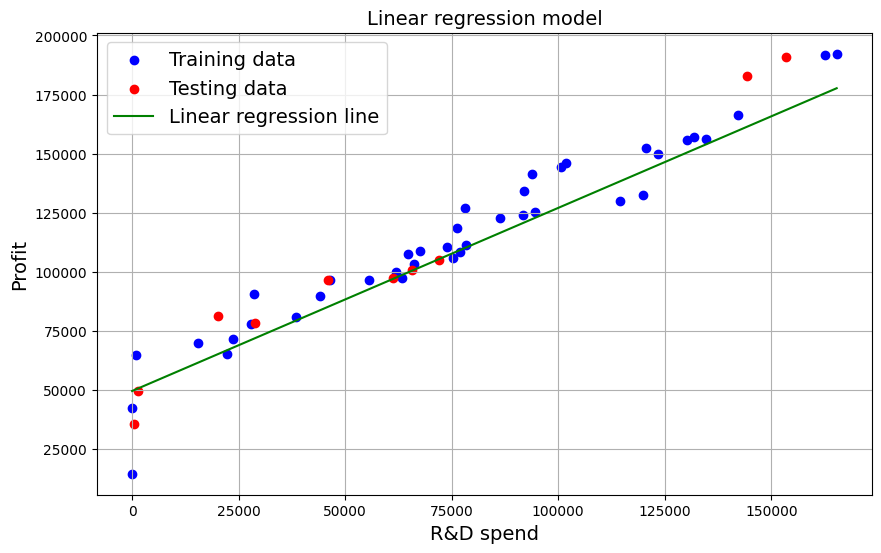

Average Mean Squared Error (cross-validation): 94907103.99328697


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

copy_x_train_df = pd.DataFrame(copy_x_train)
copy_x_test_df = pd.DataFrame(copy_x_test)
copy_x_df = pd.DataFrame(copy_x)

# Opretter lineær model
model = LinearRegression()

# Her træner vi modellen ud fra vores træningssæt
model.fit(copy_x_train, copy_y_train)

# Vi laver en forudsigelse på profitten
y_pred = model.predict(copy_x_test)

# Her laves der evaluering
mse = mean_squared_error(copy_y_test, y_pred)
print(f'Mean squared error: {mse}')

# Kode til at printe ligningen
coefficients = model.coef_
intercept = model.intercept_

equation = f'Linear regression equation: y = {intercept:.4f}'
for i, coef in enumerate(coefficients):
    equation += f' + ({coef:.4f} * {copy_x_df.columns[i]})'

print(equation)

# Visualize the regression model
plt.figure(figsize=(10, 6))

# Plot the training data
plt.scatter(copy_x_train_df.iloc[:, 0], copy_y_train, color="blue", label="Training data")

# Plot testing data
plt.scatter(copy_x_test_df.iloc[:, 0], copy_y_test, color="red", label="Testing data")

# Plot the linear regression line
x_values = np.linspace(copy_x_df.iloc[:, 0].min(), copy_x_df.iloc[:, 0].max(), 100)
y_values = intercept + coefficients[0] * x_values
plt.plot(x_values, y_values, color="green", label="Linear regression line")

plt.title("Linear regression model")
plt.xlabel("R&D spend")
plt.ylabel("Profit")
plt.legend()
plt.grid(True)
plt.show()

# Automating the process
# Use cross_val_score to perform cross validation
cv_scores = cross_val_score(model, copy_x_df, copy_y, scoring="neg_mean_squared_error", cv=5)
average_mse = -cv_scores.mean()

print(f'Average Mean Squared Error (cross-validation): {average_mse}')



#**Step 5-7**

2. Measure and compare the performance.
For each model, compute the mean and the root mean square of the performance measure on
a manually selected subset (5-10 data) of the training data.
Action: Only do for our linear regression model. Code is to be established in your notebook.
Find your stuff in section ‘Training and Evaluating on the Training Set’ in the notebook for
chapter 2.

RMSE og mean er fundet tidligere i opgaven

3. Analyze the most significant variables for each algorithm.
Action: Only do it for our linear regression model.
Code is to be established in your notebook apply a similar evaluation as done in section
‘Analyze the Best Models and Their Errors’ in the notebook for chapter 2.
To be documented – e.g. in your notebook.

Evaluering er lavet som set længere oppe med RMSE

5. Perform a quick round of feature selection and engineering.
Action: Consider which features to skip and which new feature to be defined/combined.
To be documented – e.g. in your notebook.

Vi var meget i tvivl om hvad vi skulle gøre her

1. Fine-tune the hyperparameters using cross-validation:
 Treat your data transformation choices as hyperparameters, especially when you are
not sure about them (e.g., if you’re not sure whether to replace missing values with
zeros or with the median value, or to just drop the rows).
 Unless there are very few hyperparameter values to explore, prefer random search
over grid search. If training is very long, you may prefer a Bayesian optimization
approach (e.g., using Gaussian process priors, as described by Jasper Snoek et al.).
Action: Try grid search on the LinearRegression algorithm. Indentify the relevant (hyper-)
parameters and include in the search.
Code is to be established in your notebook that is doing a grid search similar to what is done
in section ‘Fine-Tune Your Model’ in notebook for chapter 2.

Cross validation er brugt længere oppe i opgaven

3. Once you are confident about your final model, measure its performance on the test set to
estimate the generalization error. This is important!
Action: Present your model with the set of model parameters that gives the best
performance. Also present the set of hyper parameters that leads to this performance.
Code is to be established in your notebook. To be documented – e.g. in your notebook.

Test sættet er brugt længere oppe i opgaven. Se sammen med linear regression algorithm

3.  Explain why your solution achieves the business objective.
Action: To be documented – e.g. in your notebook

RMSE opnår business objective, da den er god til at hjælpe med at forudsige de forventede værdier passer som de skal have. Det er hele målet, firmaet ønsker i forbindelse med profit.



4. Do not forget to present interesting points you noticed along the way.
 Describe what worked and what did not.
 List your assumptions and your system’s limitations.
Action: To be documented – e.g. in your notebook., if any.

Vi fandt ikke noget interessant at dokumentere

5. Ensure your key findings are communicated through beautiful visualizations or easy-toremember statements (e.g., “the median income is the number-one predictor of housing
prices”).
Action: To be documented – e.g. in your notebook